# Road Traffic Severity Classification

**Problem Statement:**    The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features.

**Metric** for evaluation will be f1-score

**Importing Liabraries and reading data**

In [42]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier


# Reset the options to display all rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

sns.set_style('darkgrid')

In [2]:
def readData(data):
    df = pd.read_csv(data)
    return df

rts_data = readData('RTA Dataset.csv')

In [3]:
#checking 1st 5 rows 

rts_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


# Exploratory Data Analysis

***Here is a description for each column in the dataset:***

1. 'Time': The time at which the accident occurred.
2. 'Day_of_week': The day of the week when the accident happened.
3. 'Age_band_of_driver': The age group or band of the driver involved in the accident.
4. 'Sex_of_driver': The gender of the driver involved in the accident.
5. 'Educational_level': The educational level or qualification of the driver.
6. 'Vehicle_driver_relation': The relationship between the driver and the vehicle.
7. 'Driving_experience': The driver's level of driving experience.
8. 'Type_of_vehicle': The type or category of the vehicle involved in the accident (e.g., car, motorcycle).
9. 'Owner_of_vehicle': The owner of the vehicle.
10. 'Service_year_of_vehicle': The number of years the vehicle has been in service.
11. 'Defect_of_vehicle': Any defects or issues with the vehicle at the time of the accident.
12. 'Area_accident_occurred': The area or location where the accident occurred.
13. 'Lanes_or_Medians': Information about lanes or medians on the road where the accident took place.
14. 'Road_alignment': The alignment or layout of the road.
15. 'Types_of_Junction': The type of road junction where the accident occurred.
16. 'Road_surface_type': The type of road surface.
17. 'Road_surface_conditions': The conditions of the road surface at the time of the accident (e.g., wet, dry).
18. 'Light_conditions': The lighting conditions at the time of the accident.
19. 'Weather_conditions': The weather conditions at the time of the accident.
20. 'Type_of_collision': The type of collision that occurred.
21. 'Number_of_vehicles_involved': The total number of vehicles involved in the accident.
22. 'Number_of_casualties': The total number of casualties (injuries or fatalities) in the accident.
23. 'Vehicle_movement': Information about the movement of the vehicle during the accident.
24. 'Casualty_class': The class or type of casualties.
25. 'Sex_of_casualty': The gender of the casualties.
26. 'Age_band_of_casualty': The age group or band of the casualties.
27. 'Casualty_severity': The severity of the casualties' injuries.
28. 'Work_of_casualty': The occupation or work of the casualties.
29. 'Fitness_of_casualty': Information about the fitness or health of the casualties.
30. 'Pedestrian_movement': Information about the movement of pedestrians involved in the accident.
31. 'Cause_of_accident': The cause or reason for the accident.
32. 'Accident_severity': The severity level of the accident itself.  (Label)

In [4]:
#checking data shape and all present column names  

def dataUndersanding(data):
    print("\033[1mData Shape: \033[0m", data.shape)  #\033[1mThis text is bold\033[0m
    print("\033[1mData Duplicated Count:\033[0m", data.duplicated().sum())
    print("\033[1m=====data Information:=====\033[0m")
    display(data.info())
    print("\033[1m=====Statastical Analysis of Numeric columns: =====\033[0m")
    display(data.describe().T)
    print("\033[1m=====Statastical Analysis of Categorical columns: =====\033[0m")
    display(data.describe(include = "object").T)
    print("\033[1m=====Missing data column wise count:=====\033[0m")
#     display(data.isna().sum())
    missing_data = data.isnull().sum().to_frame(name='Missing Count')
    missing_data['Percentage Missing'] = (missing_data['Missing Count'] / len(data)) * 100
    display(missing_data)
    print("\033[1m=====Unique values per column:=====\033[0m")
    display(data.nunique())


dataUndersanding(rts_data)

Data Shape:  (12316, 32)
Data Duplicated Count: 0
=====data Information:=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_M

None

=====Statastical Analysis of Numeric columns: =====


,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


=====Statastical Analysis of Categorical columns: =====


,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


=====Missing data column wise count:=====


,Missing Count,Percentage Missing
Time,0,0.000000
Day_of_week,0,0.000000
Age_band_of_driver,0,0.000000
Sex_of_driver,0,0.000000
Educational_level,741,6.016564
Vehicle_driver_relation,579,4.701202
Driving_experience,829,6.731082
Type_of_vehicle,950,7.713543
Owner_of_vehicle,482,3.913608
Service_year_of_vehicle,3928,31.893472


=====Unique values per column:=====


Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

**Findings:**   
1) Total rows and columns are 12316, 32

2) There is no duplicated data 

3) There is missing data in many columns, 2 columns having missing data percentage greater than 30% needs to analyze the missing data columns 

4) There is no unique identifier in data 

In [5]:
# for col in rts_data.select_dtypes(include='object'):
#     if rts_data[col].nunique() <=4:
#         display(pd.crosstab(rts_data['Accident_severity'], rts_data[col], normalize='index'))

**converting 'time' to datetime**

In [6]:
# converting 'time' to datetime
rts_data['Time'] = pd.to_datetime(rts_data['Time'])

# date (day-month-year) time
rts_data["Time"].dt.hour

# extracting hour and minute from timestamp
rts_data['hour'] = rts_data['Time'].dt.hour
rts_data['minute'] = rts_data['Time'].dt.minute
rts_data.drop('Time', axis=1, inplace=True)

***Label Accident_severity count plot***

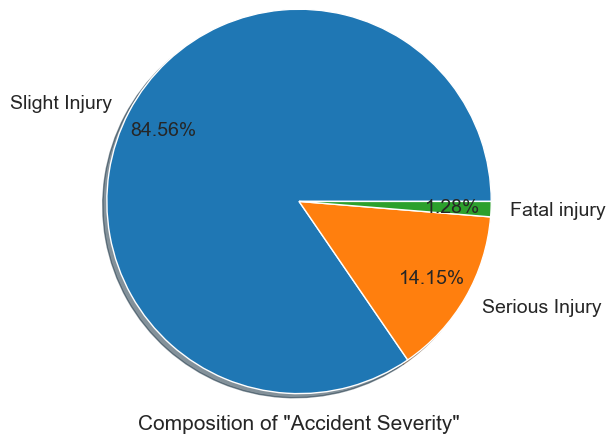

In [7]:
plt.pie(rts_data["Accident_severity"].value_counts(),
        labels=list(rts_data["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show();



It is clearly seen that label data is imabalaced 

***Label Accident Severity distribution wrt gender***

***Plotting categorical columns counts - Accident frequency by category***

In [8]:
rts_data.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour', 'minute'],
      dtype='object')

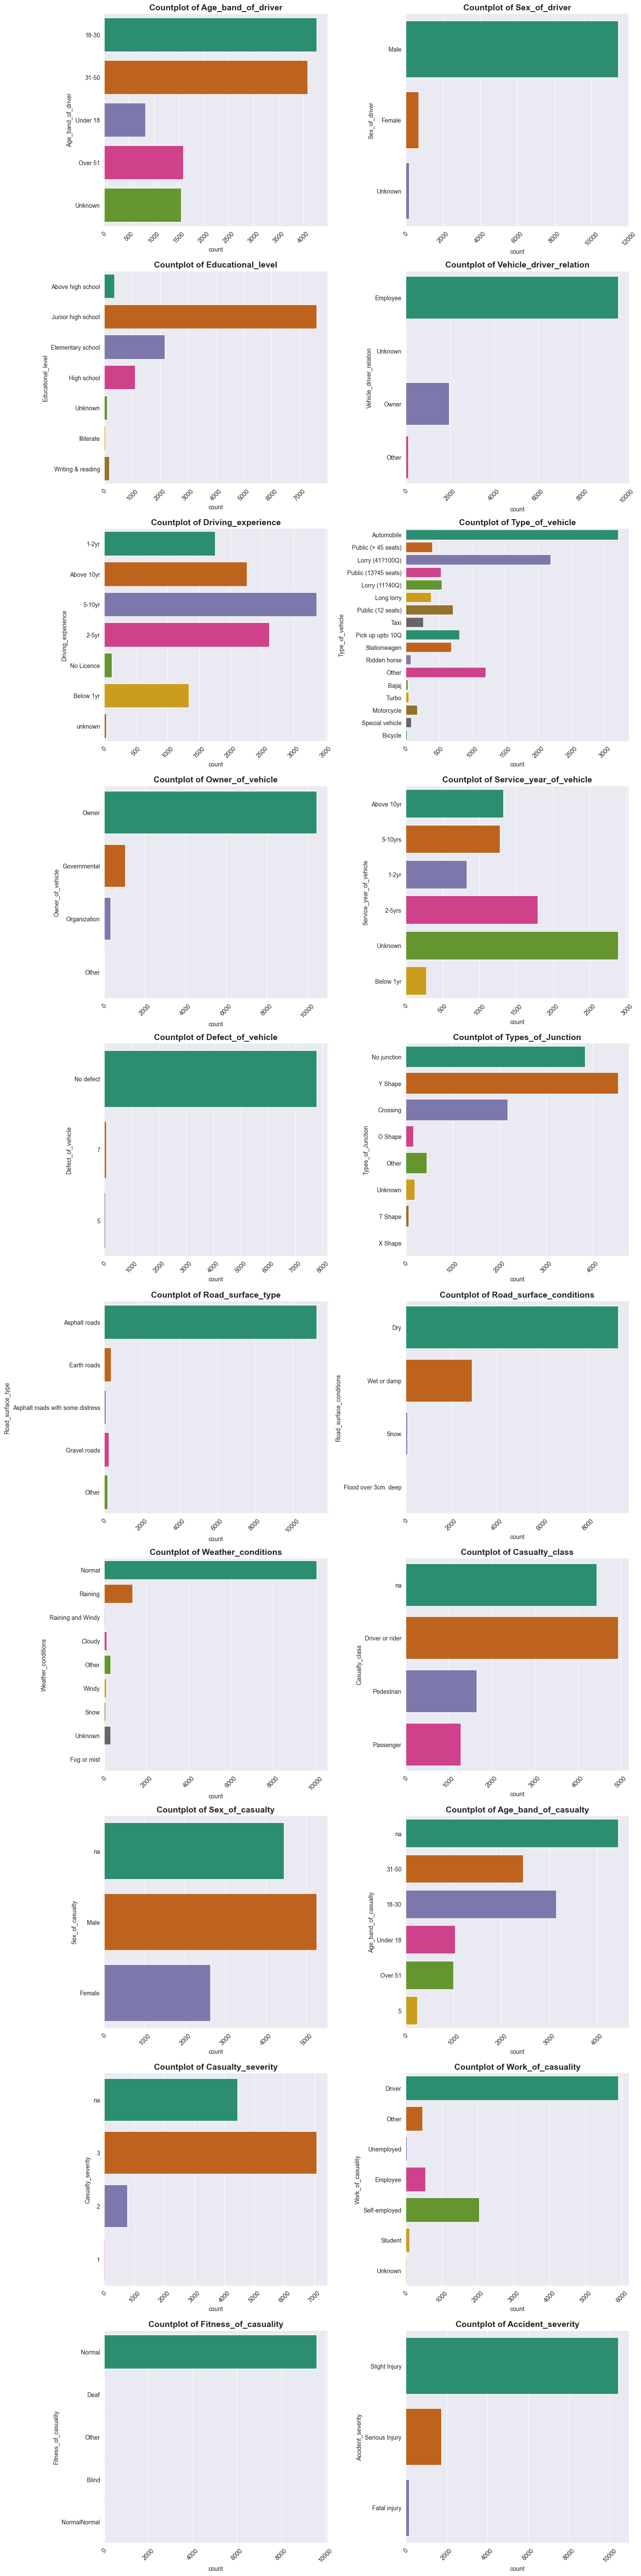

In [9]:
# Create a subplot grid
categorical_cols = rts_data.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(['Day_of_week', 'Cause_of_accident', 'Pedestrian_movement', 
                                          'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
                                          'Light_conditions', 'Type_of_collision',
                                         'Vehicle_movement', ])

num_columns = len(categorical_cols)
columns_per_row = 2

# Calculate the number of rows needed
num_rows = (len(categorical_cols) + columns_per_row - 1) // columns_per_row

# Create subplots in a multi-row layout
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 60))
# plt.subplots_adjust(wspace=0.4)
axes = axes.flatten()

# Loop through each categorical column and create countplots
for i, col in enumerate(categorical_cols):
    sns.countplot(data=rts_data, y=col, ax=axes[i], palette='Dark2')
    axes[i].set_title(f'Countplot of {col}', fontsize=14,  fontweight='bold')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any empty subplots
for i in range(len(categorical_cols), num_rows * columns_per_row):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show();


***Findings:*** 
1) Accident Severity label having 3 different classes labels are imabalaced with approximate ratio of 10:1:0.1 Serious injury and fatal injuries are less 
2) seems like measurity there is male drivers are responsible for accident

From above countplot we can see the which category is having high counts wrt accident, 

***Accident Cause count plot***

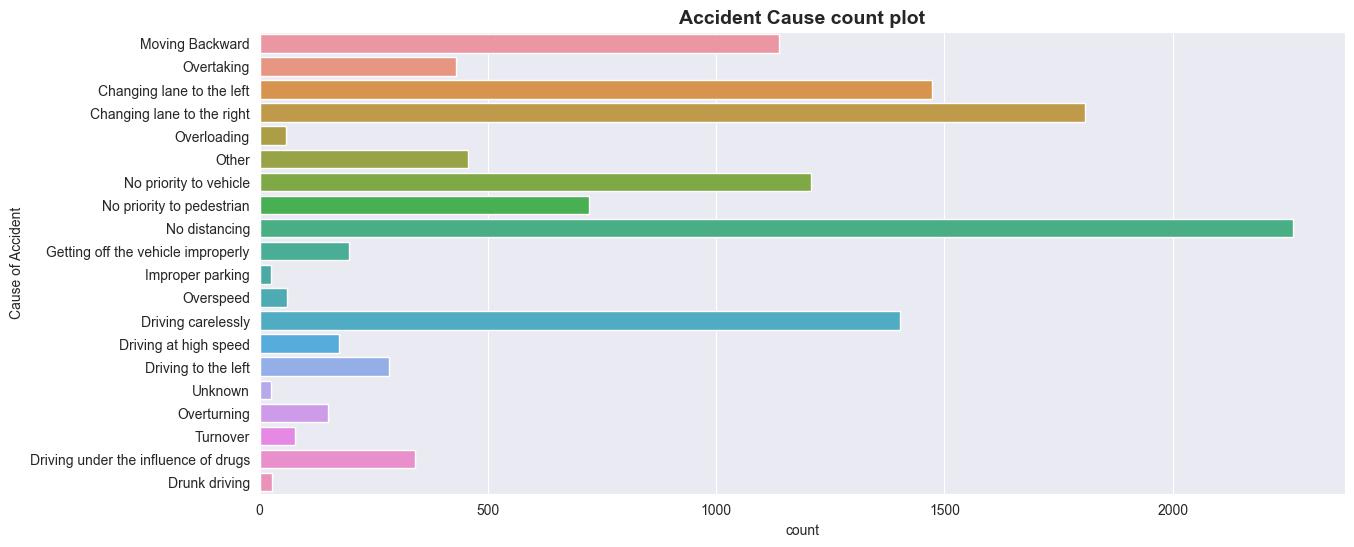

In [10]:
plt.figure(figsize=(14, 6))
sns.countplot(y = rts_data['Cause_of_accident']);
plt.ylabel('Cause of Accident')
plt.title('Accident Cause count plot', fontsize=14,  fontweight='bold')
plt.show();

***Heatmap showing correlation between Accident severity by day of the week***

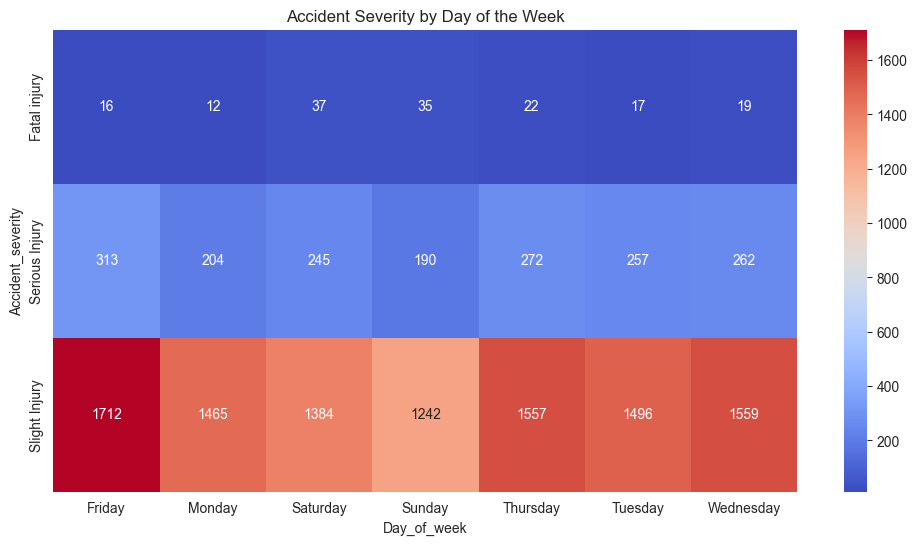

In [11]:

cross_tab = pd.crosstab(index=rts_data['Accident_severity'], columns=rts_data['Day_of_week'])

# Set up the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Day_of_week')
plt.ylabel('Accident_severity')
plt.title('Accident Severity by Day of the Week')
plt.show();

***Findings:***
1) Measority road accident happend on days major weekends count is higher. 

***5. Accident Severity with driving experience***

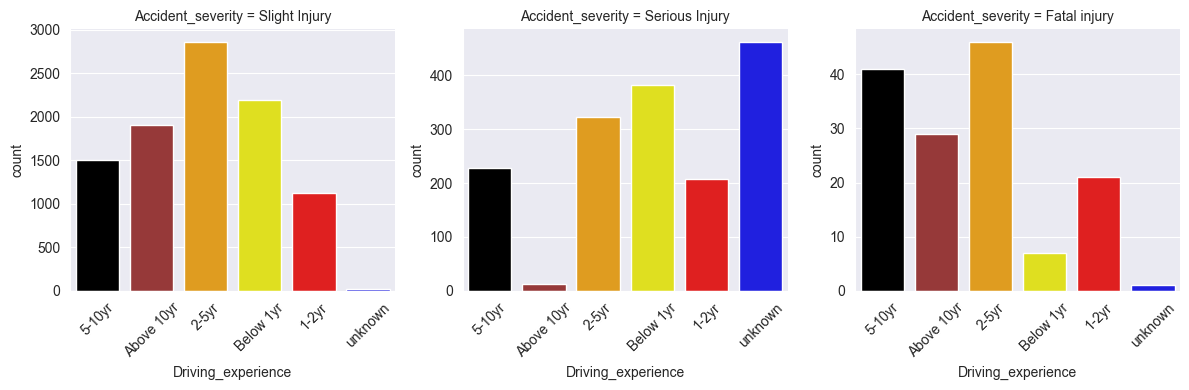

In [12]:
# creating a facet grid with columns as Serious injury and fatal 
grid = sns.FacetGrid(data=rts_data, col='Accident_severity', height=4, aspect=1, sharey=False)

grid.map(sns.countplot, 'Driving_experience', palette=['black', 'brown', 'orange', 'yellow', 'red', 'blue'])
grid.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

***6. Type of vehicle countplt***

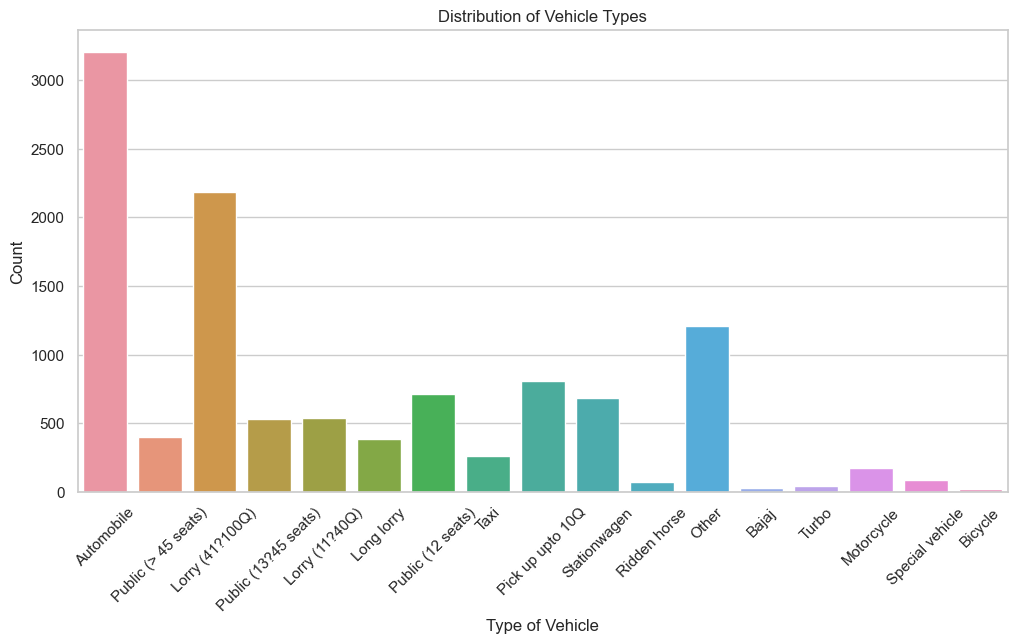

In [13]:

# Assuming you have a DataFrame called rts_data
sns.set(style="whitegrid")  # Set the plot style (optional)

# Create a bar plot
plt.figure(figsize=(12, 6))  
sns.countplot(x = rts_data['Type_of_vehicle'])
# sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, )
plt.xticks(rotation=45)  

plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Types')

plt.show()

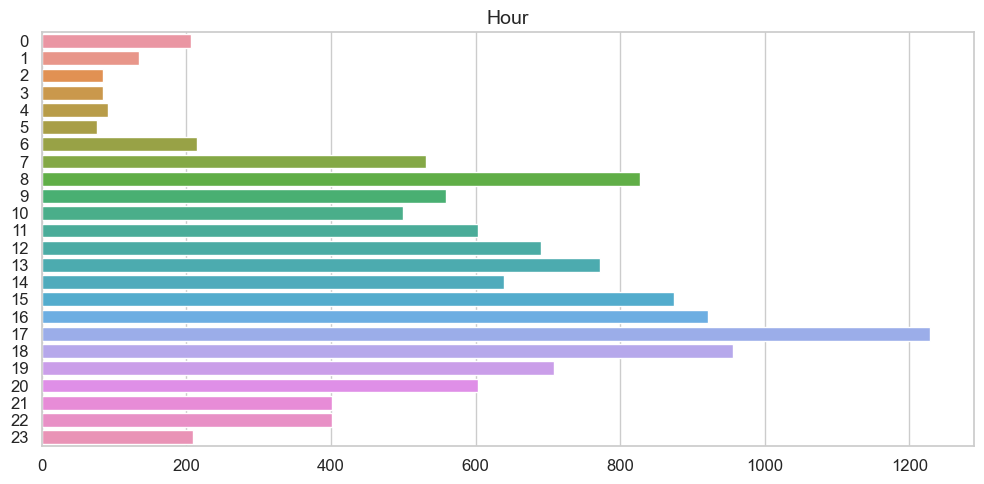

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=rts_data, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

***Analyzing missing data***

<Axes: >

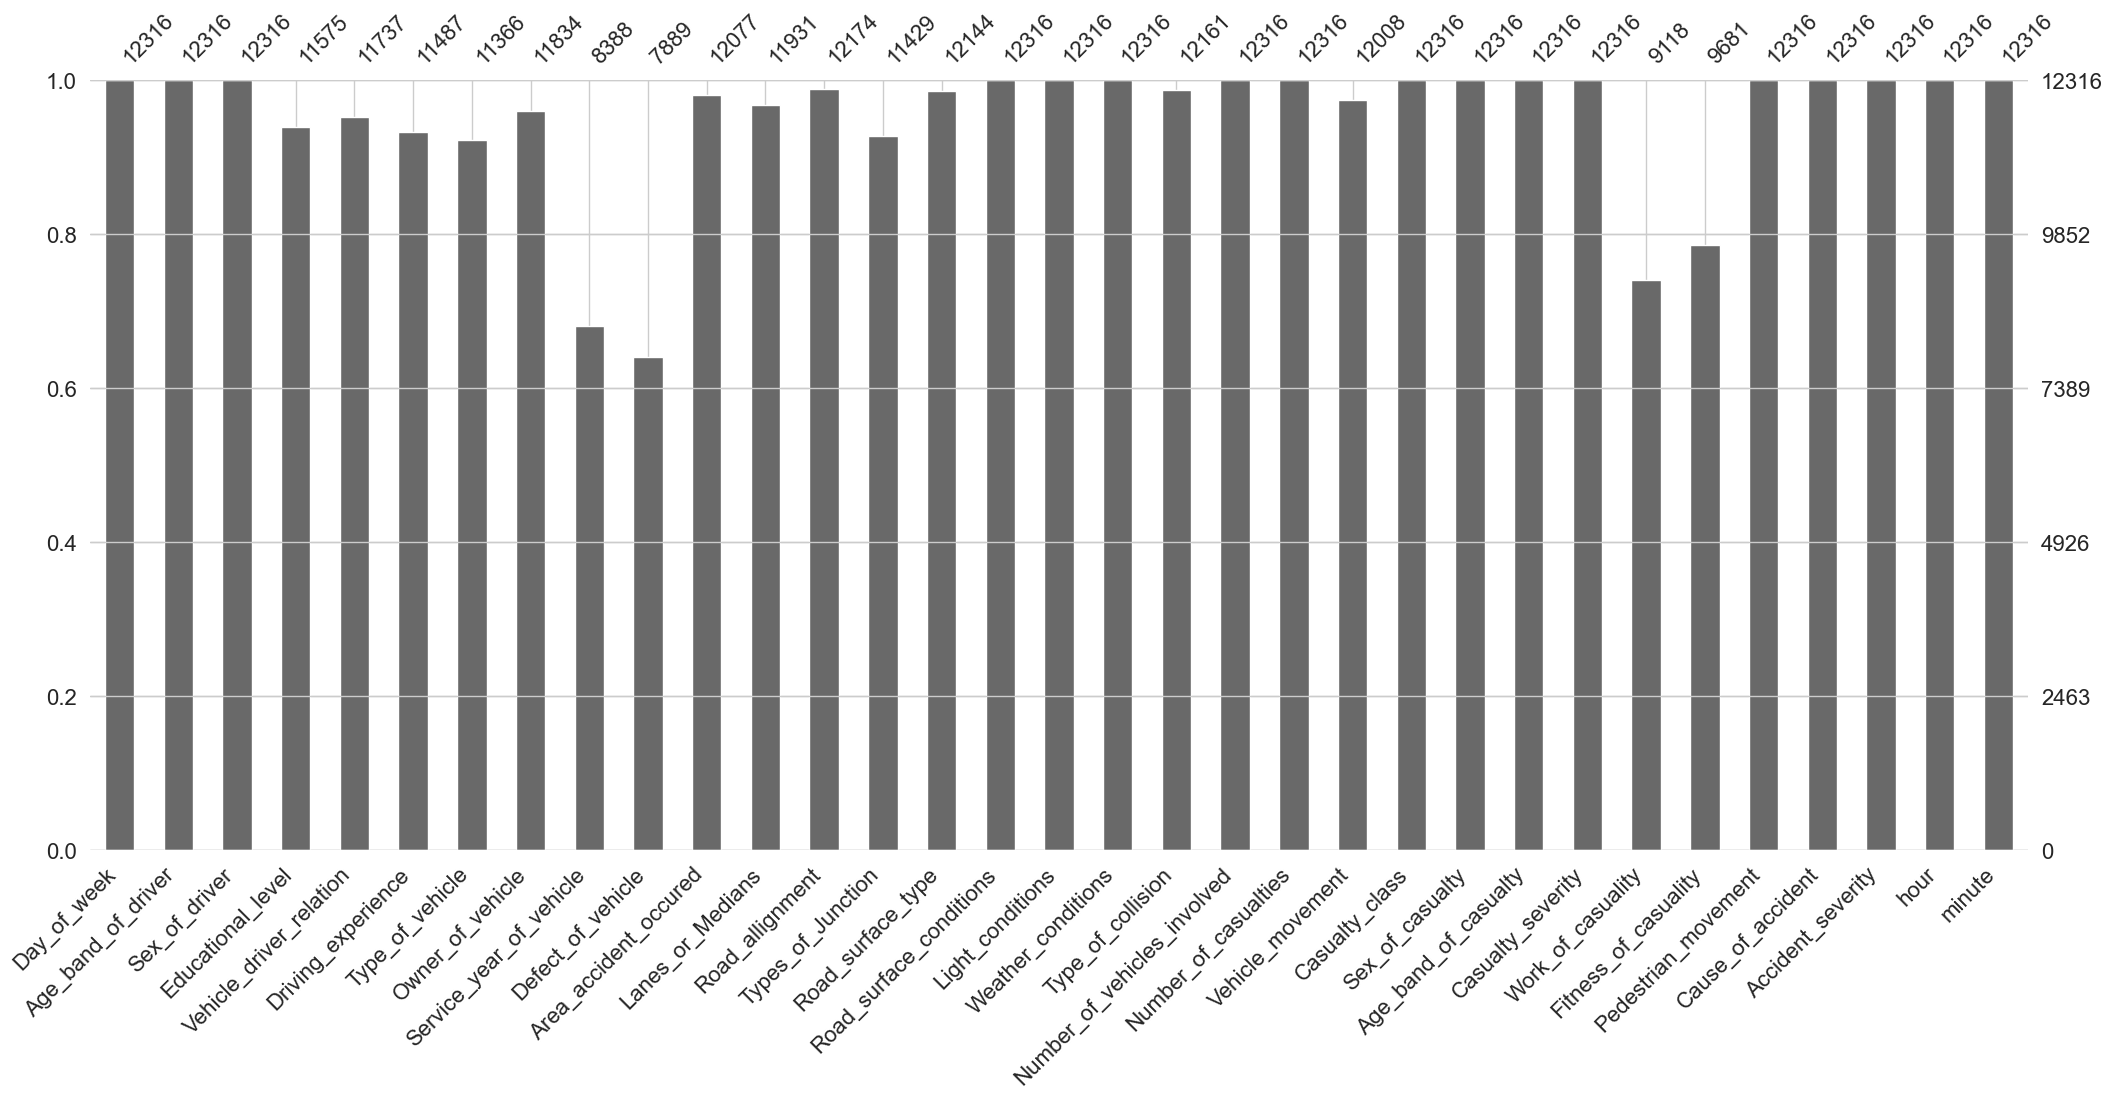

In [15]:
msno.bar(rts_data)

<Axes: >

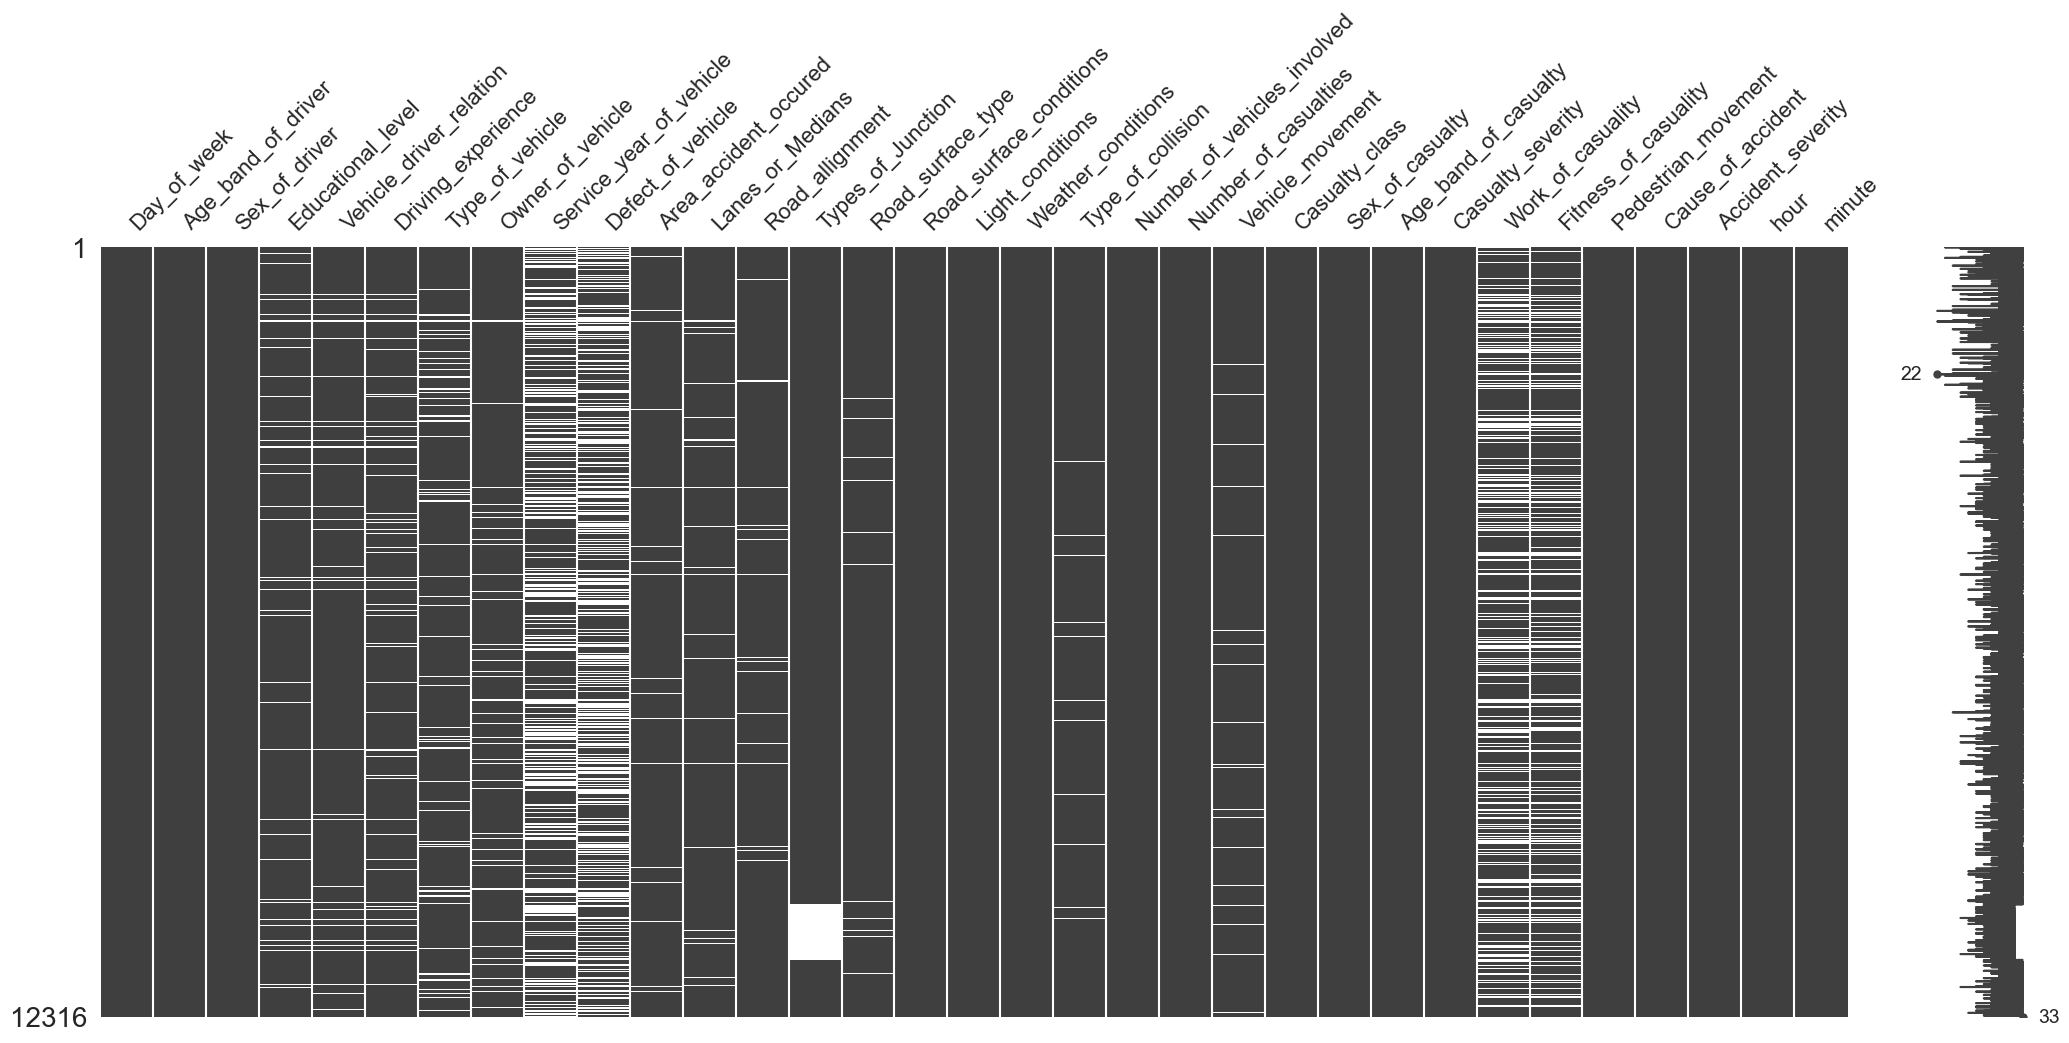

In [16]:
# Visualizing the locations of the missing data

msno.matrix(rts_data)

In [17]:
# msno.heatmap(rts_data)

There is no pattern in missing values it appears randomly.

Driving experience, vehivle driver relation, eductional levl are highly correlated features also fitness of casuality, work of casuality are also highly correlated with each other. 

In [18]:
rts_data['Educational_level'].value_counts(dropna=False)

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
NaN                    741
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

In [19]:
# rts_data['Vehicle_driver_relation'].value_counts(dropna=False)

In [20]:
# rts_data['Driving_experience'].value_counts(dropna=False)

* In educational level 741 entries missing and 100 entries are unknown  
* There are some rows with unknown in vehicle driver, driving experience 
* Filling missing value with most frequent value

In [21]:
# Replace "unknown" with NaN in all columns

# rts_data.replace("unknown", np.nan, inplace=True)

***Replacing nan values with Multivariate feature imputation because there is no particular domain specific information available to fill or treat missing data***

In [22]:
rts_data_most_frequent = rts_data.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
rts_data.iloc[:,:] = mean_imputer.fit_transform(rts_data_most_frequent)

In [23]:
rts_data.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour', 'minute'],
      dtype='object')

In [24]:
# dropping columns that can cause imbalance while imputation
rts_data.drop(columns = ['Defect_of_vehicle', 'Vehicle_driver_relation', 'Work_of_casuality', 
                         'Fitness_of_casuality'], inplace=True)

In [25]:
# x = rts_data.drop(['Accident_severity'], axis = 1)
# y = rts_data['Accident_severity']

***#one hot encoding***

In [26]:
# df_encoded = pd.get_dummies(x)

In [27]:
# df_encoded.shape

In [28]:
# label_encoder = LabelEncoder()
# # rts_data['Accident_severity'] = rts_data['Accident_severity'].apply(label_encoder.fit_transform)
# rts_data['Accident_severity'] = label_encoder.fit_transform(rts_data['Accident_severity'])

In [29]:
# y = rts_data['Accident_severity']

***#Label encoder***

In [30]:
# Identify categorical columns
categorical_cols = rts_data.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
rts_data[categorical_cols] = rts_data[categorical_cols].apply(label_encoder.fit_transform)

In [31]:
x = rts_data.drop(['Accident_severity'], axis = 1)
y = rts_data['Accident_severity']

In [32]:
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [43]:


def apply_classification_models(X, y, test_size=0.25, random_state=42):
    """
    Apply multiple classification models to data and create an output DataFrame with model names, accuracy, 
    recall, and F1 scores.
    
    Parameters:
    - X: The feature matrix (DataFrame or array-like).
    - y: The target variable (Series or array-like).
    - test_size: The proportion of the dataset to include in the test split (default: 0.2).
    - random_state: Seed for random number generation (default: 42).
    
    Returns:
    - result_df: A DataFrame containing model names, accuracy, recall, and F1 scores.
    """
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Define a list of classification models
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('SVM', SVC()),
        ('XGBoost', xgb.XGBClassifier()),
        ('Extra Trees', ExtraTreesClassifier())  # Added Extra Trees Classifier
    ]
    
    # Initialize an empty list to store results
    results = []
    
    # Loop through each model, fit it to the data, and calculate accuracy, recall, and F1 score
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append({'Model': model_name, 'Accuracy': accuracy, 'Recall': recall, 'F1 Score': f1})
    
    # Convert the list of results to a DataFrame
    result_df = pd.DataFrame(results)
    sorted_df = result_df.sort_values(by='F1 Score', ascending=False)
    
    return sorted_df

result_df = apply_classification_models(X_resampled, y_resampled)


In [44]:
result_df

,Model,Accuracy,Recall,F1 Score
5,Extra Trees,0.949053,0.949053,0.949070
2,Random Forest,0.933052,0.933052,0.933050
4,XGBoost,0.928187,0.928187,0.928049
1,Decision Tree,0.849078,0.849078,0.847522
3,SVM,0.699437,0.699437,0.695192
0,Logistic Regression,0.548643,0.548643,0.548239


In [45]:
extree = ExtraTreesClassifier()
extree.fit(X_resampled, y_resampled)
y_pred = extree.predict(X_test)

In [46]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Hyperparameter tunning

In [48]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_resampled, y=y_resampled)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_resampled, y=y_resampled)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 400},
 0.8353202197058959)

In [49]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_resampled, y=y_resampled)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 2)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_resampled, y=y_resampled)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 2},
 0.9052272053795553)

In [50]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)



extree_tuned.fit(X_resampled, y_resampled)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)

In [51]:
print(extree_tuned.feature_importances_)

[0.05044968 0.05760586 0.01451925 0.02955058 0.04229218 0.03120502
 0.01963842 0.03093731 0.02410782 0.03782995 0.01395925 0.04331431
 0.01070057 0.04328835 0.07619844 0.01901637 0.03341999 0.06591502
 0.08591956 0.01966137 0.02849228 0.03124621 0.02820103 0.02290951
 0.00960339 0.03294632 0.04242551 0.05464642]


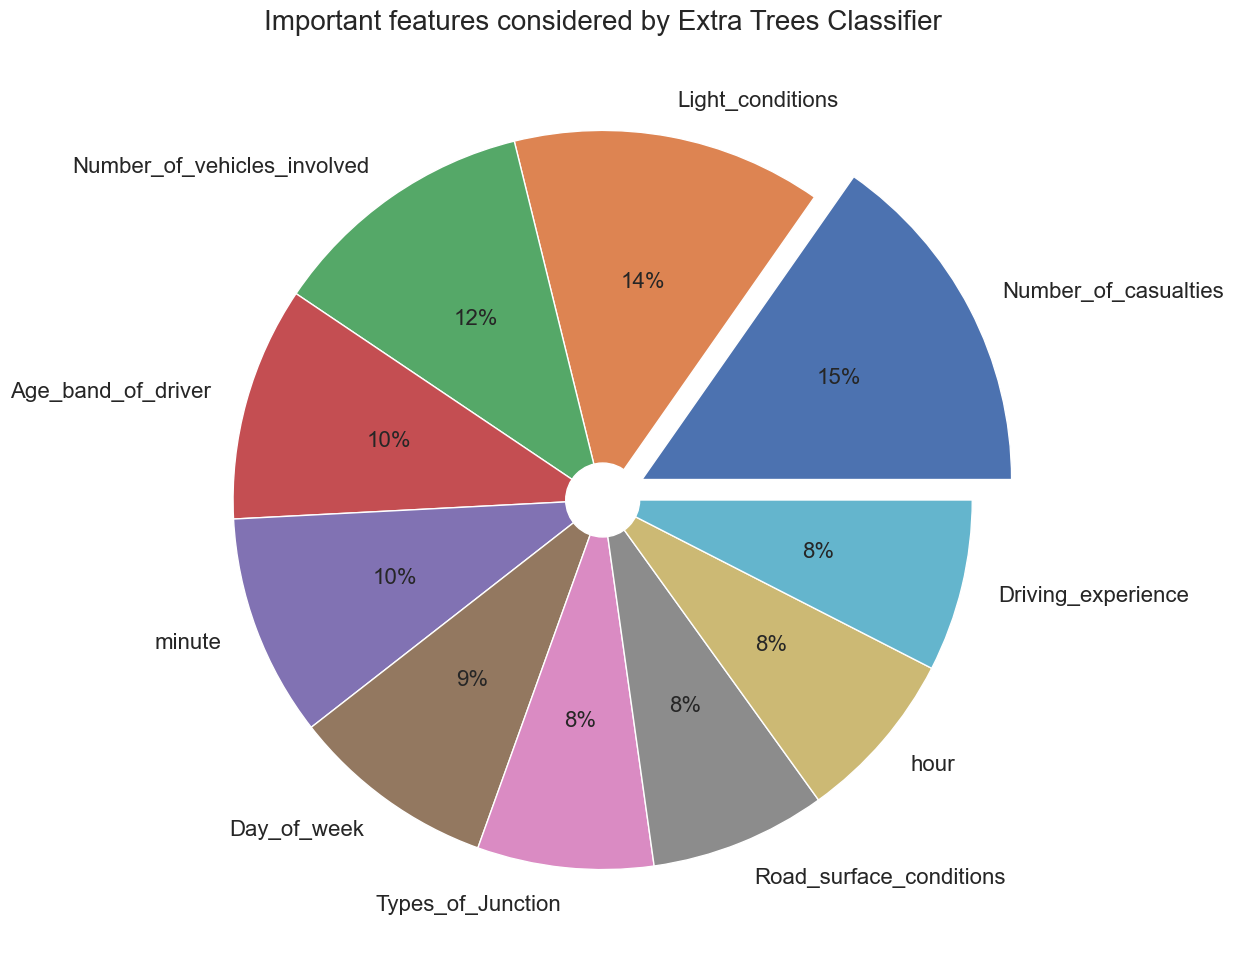

In [53]:
feat_importances = pd.Series(extree_tuned.feature_importances_, index=x.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

# Hyper parameter by optuna

In [55]:
import optuna

In [57]:
# Define the objective function to optimize
def objective(trial):
    # Split the data into train and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    # Convert 'max_features' to None if it's 'auto' or 'sqrt'
    if max_features in ['auto', 'sqrt']:
        max_features = None
    
    # Create an Extra Trees Classifier with the suggested hyperparameters
    clf = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = clf.predict(X_valid)
    
    # Calculate the F1 score as the metric to optimize
    f1 = f1_score(y_valid, y_pred, average='weighted')
    
    return f1


# Create an Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize the F1 score

# Optimize the objective function
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the Extra Trees Classifier with the best hyperparameters on the full dataset
best_extra_trees = ExtraTreesClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

best_extra_trees.fit(X_resampled, y_resampled)


[I 2023-09-15 11:21:40,099] A new study created in memory with name: no-name-00abe228-532a-4a98-9e80-73571815b091
[I 2023-09-15 11:21:40,920] Trial 0 finished with value: 0.16401405892210888 and parameters: {'n_estimators': 179, 'max_depth': 25, 'min_samples_split': 0.8173339320400776, 'min_samples_leaf': 0.2685727599222039, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.16401405892210888.
[I 2023-09-15 11:21:41,431] Trial 1 finished with value: 0.16401405892210888 and parameters: {'n_estimators': 109, 'max_depth': 20, 'min_samples_split': 0.3053768357007932, 'min_samples_leaf': 0.4525764250511465, 'max_features': 'auto', 'bootstrap': True}. Best is trial 0 with value: 0.16401405892210888.
[I 2023-09-15 11:21:42,365] Trial 2 finished with value: 0.480529429389436 and parameters: {'n_estimators': 99, 'max_depth': 22, 'min_samples_split': 0.8205659418249169, 'min_samples_leaf': 0.13481941346079285, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 wi

[I 2023-09-15 11:22:21,443] Trial 27 finished with value: 0.5154548234520369 and parameters: {'n_estimators': 213, 'max_depth': 20, 'min_samples_split': 0.8074618387955672, 'min_samples_leaf': 0.16451030823400975, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 12 with value: 0.5351801272199667.
[I 2023-09-15 11:22:21,935] Trial 28 finished with value: 0.5277050682446099 and parameters: {'n_estimators': 156, 'max_depth': 27, 'min_samples_split': 0.987020734435911, 'min_samples_leaf': 0.1252945720068067, 'max_features': 'log2', 'bootstrap': False}. Best is trial 12 with value: 0.5351801272199667.
[I 2023-09-15 11:22:22,831] Trial 29 finished with value: 0.16401405892210888 and parameters: {'n_estimators': 286, 'max_depth': 13, 'min_samples_split': 0.8424496316972045, 'min_samples_leaf': 0.15661260808449012, 'max_features': None, 'bootstrap': True}. Best is trial 12 with value: 0.5351801272199667.
[I 2023-09-15 11:22:23,701] Trial 30 finished with value: 0.5274905549228509 and

[I 2023-09-15 11:22:59,197] Trial 54 finished with value: 0.5323712516074208 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 0.9128955821729908, 'min_samples_leaf': 0.10082951853570064, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 32 with value: 0.5355393711518632.
[I 2023-09-15 11:23:01,096] Trial 55 finished with value: 0.5326055879166097 and parameters: {'n_estimators': 295, 'max_depth': 10, 'min_samples_split': 0.9594424296151699, 'min_samples_leaf': 0.10282948374300739, 'max_features': None, 'bootstrap': False}. Best is trial 32 with value: 0.5355393711518632.
[I 2023-09-15 11:23:02,986] Trial 56 finished with value: 0.5219331194083128 and parameters: {'n_estimators': 299, 'max_depth': 10, 'min_samples_split': 0.9587883674567524, 'min_samples_leaf': 0.15135460931110714, 'max_features': None, 'bootstrap': False}. Best is trial 32 with value: 0.5355393711518632.
[I 2023-09-15 11:23:04,827] Trial 57 finished with value: 0.5324147771224672 and

[I 2023-09-15 11:23:46,761] Trial 81 finished with value: 0.5315721746303833 and parameters: {'n_estimators': 271, 'max_depth': 21, 'min_samples_split': 0.8987223024131253, 'min_samples_leaf': 0.1539286908447274, 'max_features': None, 'bootstrap': False}. Best is trial 60 with value: 0.536028716995185.
[I 2023-09-15 11:23:48,751] Trial 82 finished with value: 0.5294675959957791 and parameters: {'n_estimators': 277, 'max_depth': 18, 'min_samples_split': 0.8849936612997601, 'min_samples_leaf': 0.1741355951501456, 'max_features': None, 'bootstrap': False}. Best is trial 60 with value: 0.536028716995185.
[I 2023-09-15 11:23:50,764] Trial 83 finished with value: 0.5353598477217308 and parameters: {'n_estimators': 274, 'max_depth': 19, 'min_samples_split': 0.9823375046422749, 'min_samples_leaf': 0.11320467761643818, 'max_features': None, 'bootstrap': False}. Best is trial 60 with value: 0.536028716995185.
[I 2023-09-15 11:23:52,509] Trial 84 finished with value: 0.5285329102225041 and parame

Best Hyperparameters: {'n_estimators': 286, 'max_depth': 21, 'min_samples_split': 0.9225967136769692, 'min_samples_leaf': 0.11292401022766116, 'max_features': None, 'bootstrap': False}


ExtraTreesClassifier(max_depth=21, max_features=None,
                     min_samples_leaf=0.11292401022766116,
                     min_samples_split=0.9225967136769692, n_estimators=286,
                     random_state=42)

In [67]:
# best_extra_trees.feature_importances_

In [65]:
# Access the best score (maximum score for 'maximize', minimum score for 'minimize')
best_score = study.best_value

In [66]:
best_score

0.5360287607610024

# Saving model

In [68]:
# import joblib

# # You can save the model to a file using joblib
# model_filename = "best_extra_trees_model.joblib"
# joblib.dump(extree, model_filename)
